En este análisis, exploramos un conjunto de datos que contiene reseñas de programas de televisión de IMDB.
Investigaremos la distribución de los ratings, los atributos textuales de las reseñas y intentaremos construir un predictor que estime la calificación basándose únicamente en el texto de la reseña. La precisión del predictor (o puntuación de clasificación) se calculará una vez que el modelo esté entrenado.

En este trabajo se explorará la relación entre las reseñas de los usuarios y los ratings, puntajes y, por consiguiente, la popularidad o éxito que podrían tener las producciones fílmicas. Utilizaremos procesamiento de lenguaje natural (NLP) para procesar, limpiar y transformar de manera ordenada las reseñas, y luego crearemos un modelo de redes neuronales que intente predecir ratings o, al menos, predecir si una reseña conllevará una valoración positiva o negativa.

Comencemos nuestra exploración.

# Breve seteo de librerias y plugis necesarios

In [ ]:
!pip install spacy
!pip install symspellpy
!python -m spacy download en_core_web_md

import warnings
warnings.filterwarnings("ignore")
# Importar las bibliotecas nesesarias
import os
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from textblob import TextBlob
import seaborn as sns
import time
# Importar SMOTE
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords # permite acceder directamente a las listas de palabras vacías (stopwords) una vez que se han descargado, sin necesidad de referirse a todo el módulo NLTK.
import pandas as pd #Una librería esencial para la manipulación y análisis de datos estructurados en Python. Utiliza DataFrames para organizar datos en tablas.
import numpy  as np #Una librería fundamental para cálculos numéricos y manipulación de matrices en Python.
import re # Proporciona operaciones de expresiones regulares para buscar y manipular cadenas. Puedes usar re para encontrar todas las direcciones de correo electrónico en el texto, como "juan.perez@example.com" o para extraer todos los números de teléfono en un formato específico, como "+34-123-456-789".
import string # Ofrece una serie de constantes y clases para operaciones comunes con cadenas. Usando las constantes de string, puedes eliminar todos los caracteres de puntuación del texto, resultando en "Hola Como estas Espero que todo este bien".
import plotly # Una librería de gráficos interactivos para crear gráficos de alta calidad para visualización de datos.
import matplotlib.pyplot as plt #Una colección de funciones que hacen que matplotlib sea similar a MATLAB. Se usa para crear gráficos y visualizaciones estáticas, animadas e interactivas en Python.
from nltk.stem import PorterStemmer #Un módulo de NLTK para stemming, es decir, para reducir las palabras a su raíz morfológica.
import time # El módulo time proporciona funciones para trabajar con el tiempo.
import spacy #Una librería para procesamiento de lenguaje natural avanzada y eficiente. Ofrece herramientas para tokenización, etiquetado POS, análisis de dependencias, etc.
import en_core_web_md # Un modelo de spaCy para el idioma español.
from collections import Counter
import nltk # importar natural language toolkit
from nltk import ngrams
from nltk.tokenize import word_tokenize #Una función para dividir el texto en palabras.
from nltk.tokenize import sent_tokenize #Una función para dividir el texto en oraciones.
nltk.download('punkt') # modulo para descargar punkt en diferentes idiomas. El módulo punkt(punto en alemán) incluye modelos preentrenados para varios idiomas, lo que permite reconocer oraciones y palabras en esos idiomas sin necesidad de depender de separadores simples como espacios o signos de puntuación.
nltk.download('stopwords') # modulo para descargar stopwords en diferentes idiomas
nltk.download('wordnet') # modulo para descarga WordNet, una base de datos léxica de inglés que agrupa palabras en conjuntos de sinónimos.
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer # Convierte una colección de documentos de texto en una matriz de recuentos de tokens (términos).
from sklearn.feature_extraction.text import TfidfTransformer # Transforma una matriz de recuentos en una matriz de TF-IDF (Frecuencia de Término-Inversa Frecuencia de Documento).
from nltk.probability import FreqDist #Un módulo de NLTK que proporciona herramientas para calcular la distribución de frecuencias de elementos en un corpus.
from wordcloud import WordCloud # Una biblioteca para generar nubes de palabras a partir de un texto. Las nubes de palabras son una forma visual de representar la frecuencia de palabras.
import pickle # Un módulo para serializar y deserializar estructuras de datos de Python, es decir, guardar y cargar objetos de Python en archivos binarios.
from symspellpy import SymSpell # Importación específica: Este comando importa solo la clase SymSpell de la librería symspellpy para su uso en el código.Una librería para corrección ortográfica en tiempo real y sugerencias de palabras. Es rápida y eficiente.
import pkg_resources # Un módulo para trabajar con recursos y dependencias de paquetes en Python. Manejo de recursos: pkg_resources permite acceder y manipular recursos dentro de paquetes instalados, como archivos de datos, plantillas, imágenes, etc.Información de paquetes: Proporciona métodos para obtener información sobre los paquetes instalados, como versiones, autores, descripciones, etc.Resolución de dependencias: Puede ayudar en la resolución de dependencias de paquetes, permitiendo que tu código sea compatible con diferentes versiones de paquetes instalados.Acceso a archivos en paquetes: Permite acceder a archivos dentro de los paquetes instalados, lo que puede ser útil para cargar configuraciones, recursos o datos específicos del paquete.Compatibilidad de plataforma: Proporciona funciones para trabajar con rutas de archivos y nombres de paquetes que son compatibles con diferentes sistemas operativos.
from symspellpy import SymSpell, Verbosity # Clases y constantes de symspellpy para manejar la corrección ortográfica y la generación de sugerencias. Lo que facilita su utilización sin tener que importar cada elemento por separado, simplificando así el desarrollo de aplicaciones que requieran corrección ortográfica y sugerencias de palabras.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 23.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Levanto el Dataset

In [ ]:
# Monto Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Cargar el dataset de reviews de pelis de IMDb en un Df
import pandas as pd
dataset_path = "/content/drive/My Drive/imdb_tvshows.csv"  # levanto el data set con varibale relativ
df = pd.read_csv(dataset_path)

# Mostrar las primeras filas del DataFrame
print(df.head())


   Unnamed: 0  Rating (out of 10)  \
0           0                   9   
1           1                  10   
2           2                  10   
3           3                   9   
4           4                   9   

                                              Review    Show ID   Review ID  
0  Andor was every bit as good as I was hoping fo...  tt9253284  rw10514299  
1  Wow. I just finished episode 12 of the first s...  tt9253284   rw8690571  
2  Andor Season 2 is the best Star Wars Show ever...  tt9253284  rw10514285  
3  There were a few episodes I didn't like in bot...  tt9253284  rw10514788  
4  Didnt like the new movies and even Mandalorian...  tt9253284   rw8665236  


# Breve EDA

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8319 non-null   int64 
 1   Rating (out of 10)  8319 non-null   int64 
 2   Review              8319 non-null   object
 3   Show ID             8319 non-null   object
 4   Review ID           8319 non-null   object
dtypes: int64(2), object(3)
memory usage: 325.1+ KB

Missing values in each column:
Unnamed: 0            0
Rating (out of 10)    0
Review                0
Show ID               0
Review ID             0
dtype: int64


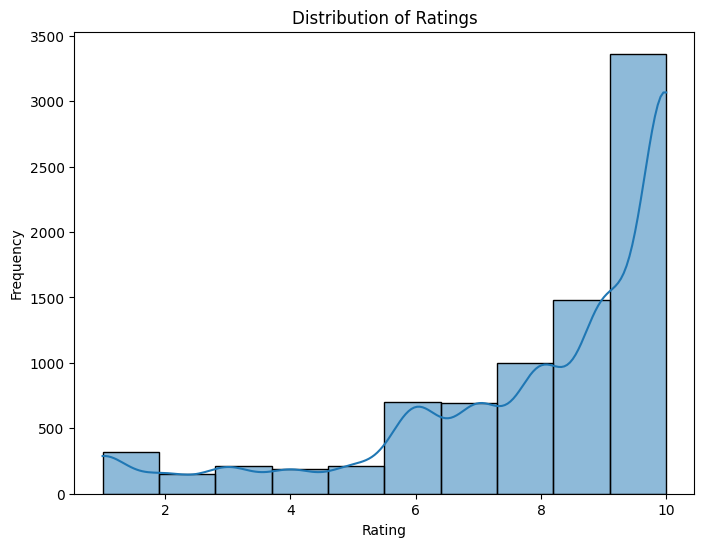

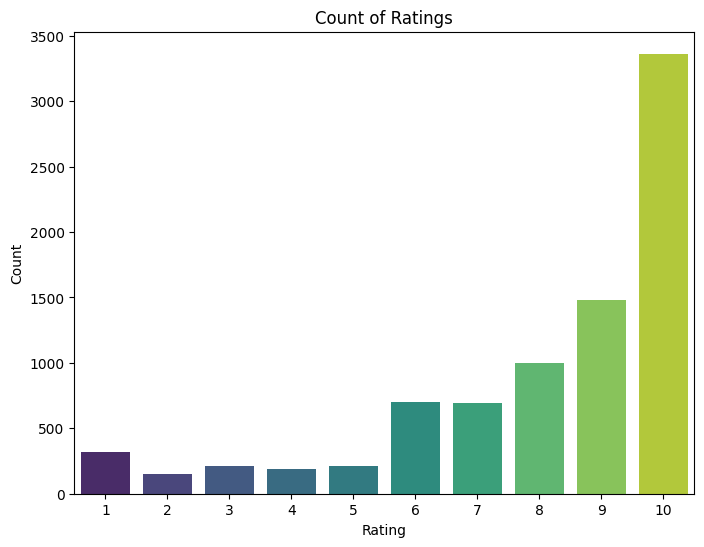

In [ ]:
# Info basica
print('DataFrame Information:')
df.info()

# Revisamos nulos
print('\nMissing values in each column:')
print(df.isnull().sum())

# Distribucion of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating (out of 10)'], kde=True, bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Countplot para frecuencias
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating (out of 10)', data=df, palette='viridis')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Mostrar informacion general sobre el Df
print(df.info())
# Muyestra aleatoria de 5 filas del DataFrame
print(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8319 non-null   int64 
 1   Rating (out of 10)  8319 non-null   int64 
 2   Review              8319 non-null   object
 3   Show ID             8319 non-null   object
 4   Review ID           8319 non-null   object
dtypes: int64(2), object(3)
memory usage: 325.1+ KB
None
      Unnamed: 0  Rating (out of 10)  \
2615        2615                   9   
3077        3077                  10   
3198        3198                   9   
2359        2359                  10   
777          777                  10   

                                                 Review    Show ID  Review ID  
2615  My wife and I really enjoyed this show. You co...  tt4236770  rw7791763  
3077  It's not a perfect show because it isn't a per...  tt9288030  rw7864372  
3198  I see tv shows

Descripción Estadística: Proporciona estadísticas como la media, mediana, y desviación estándar para las columnas numéricas, ayudando a entender la distribución de los datos.



In [ ]:
print(df.describe())


        Unnamed: 0  Rating (out of 10)
count  8319.000000         8319.000000
mean   4159.000000            8.063349
std    2401.632778            2.441713
min       0.000000            1.000000
25%    2079.500000            7.000000
50%    4159.000000            9.000000
75%    6238.500000           10.000000
max    8318.000000           10.000000


# NLP tareas de procesamiento, limpieza y preparacion de texto

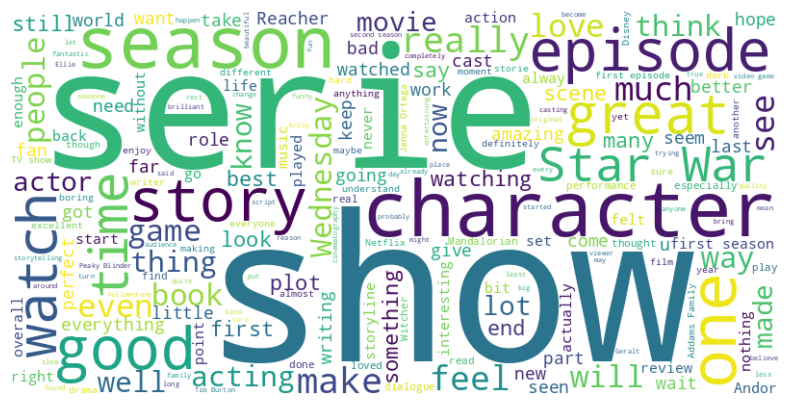

In [ ]:
text = ' '.join(df['Review'].dropna())  # Combina todos los textos en una sola cadena

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar ejes
plt.show()


Utilizo Spacy modelo mediano en ingles

In [ ]:
# Cargar el modelo en inglés de tamaño mediano
nlp = spacy.load('en_core_web_md')

Named Entity Recognition (NER)

In [ ]:
 # Función para extraer entidades
def extract_entities(reviews):
    entities = []
    for review in reviews:
        doc = nlp(review)
        for ent in doc.ents:
            entities.append(ent.text)
    return entities

# Extraer entidades de la columna 'Review'
entities = extract_entities(df['Review'].tolist())

# Contar la frecuencia de las entidades
entity_counts = Counter(entities)

# Obtener las 10 entidades más comunes
top_entities = entity_counts.most_common(10)
print("Top 10 entidades más usadas:")
for entity, count in top_entities:
    print(f"{entity}: {count}")

Top 10 entidades más usadas:
first: 1759
Wednesday: 1662
one: 1068
Star Wars: 802
two: 640
season 2: 550
Netflix: 524
Witcher: 462
second: 449
Mandalorian: 443


Aplicacion de Trigramas (hilo de 5) con las entidades del NER del paso anterior

In [ ]:
# Función para generar trigramas
def generate_trigrams(text):
    tokens = text.split()
    return list(ngrams(tokens, 3))

# Almacenar trigramas relacionados con las entidades
trigrams_by_entity = {entity: [] for entity, _ in top_entities}

# Generar trigramas para cada reseña y relacionarlos con las entidades
for review in df['Review']:
    trigrams = generate_trigrams(review)
    for entity in trigrams_by_entity.keys():
        if entity in review:
            trigrams_by_entity[entity].extend(trigrams)

# Mostrar trigramas relacionados con las entidades
for entity, trigrams in trigrams_by_entity.items():
    print(f"\nTrigramas relacionados con la entidad '{entity}':")
    # Contar trigramas y mostrar los más comunes
    trigram_counts = Counter(trigrams)
    for trigram, count in trigram_counts.most_common(5):  # Mostrar los 5 más comunes
        print(f"{trigram}: {count}")



Trigramas relacionados con la entidad 'first':
('one', 'of', 'the'): 231
('the', 'first', 'season'): 230
('in', 'the', 'first'): 195
('the', 'first', 'episode'): 195
('a', 'lot', 'of'): 189

Trigramas relacionados con la entidad 'Wednesday':
('a', 'lot', 'of'): 81
('the', 'Addams', 'Family'): 75
('of', 'the', 'Addams'): 72
('Jenna', 'Ortega', 'is'): 71
('one', 'of', 'the'): 61

Trigramas relacionados con la entidad 'one':
('one', 'of', 'the'): 682
('a', 'lot', 'of'): 406
('of', 'the', 'best'): 383
('is', 'one', 'of'): 250
('this', 'show', 'is'): 249

Trigramas relacionados con la entidad 'Star Wars':
('the', 'Star', 'Wars'): 277
('a', 'Star', 'Wars'): 100
('of', 'Star', 'Wars'): 84
('Star', 'Wars', 'universe'): 82
('one', 'of', 'the'): 72

Trigramas relacionados con la entidad 'two':
('the', 'first', 'two'): 139
('a', 'lot', 'of'): 128
('one', 'of', 'the'): 113
('some', 'of', 'the'): 74
('of', 'the', 'best'): 69

Trigramas relacionados con la entidad 'season 2':
('wait', 'for', 'seaso

limpieza, stopwords, lematizar, minusculas

In [ ]:


# Eliminar filas con valores nulos en la columna 'Review'
reviews = df['Review'].dropna()

# Obtener las stopwords en inglés y crear un conjunto
stop_words = set(stopwords.words('english'))

# Agregar stopwords personalizadas directamente
custom_stopwords = {'show', 'series', 'episode'}  # Acá le meto cosas nuevcas si necesito
stop_words.update(custom_stopwords)  # Combinar stopwords de NLTK con las personalizadas

# Eliminar stopwords y lematizar en un solo paso
lemmatized_words = []

for review in reviews:
    # Convertir a minúsculas
    review = review.lower()

    # Procesar cada reseña individualmente
    doc = nlp(review)
    lemmatized_words.extend([token.lemma_ for token in doc if token.text.lower() not in stop_words and not token.is_punct])


Probando que palabras pueden o no estar en las stopwords del modelo

In [ ]:
# Obtener la lista de stopwords del modelo
stop_words = nlp.Defaults.stop_words

# Palabras a verificar
words_to_check = ["know", "well", "think"]

# Verificar si las palabras están en la lista de stopwords
for word in words_to_check:
    if word.lower() in stop_words:  # Convertir a minúsculas para la verificación
        print(f"{word} es una stopword.")
    else:
        print(f"{word} NO es una stopword.")

know NO es una stopword.
well es una stopword.
think NO es una stopword.


Cloud words

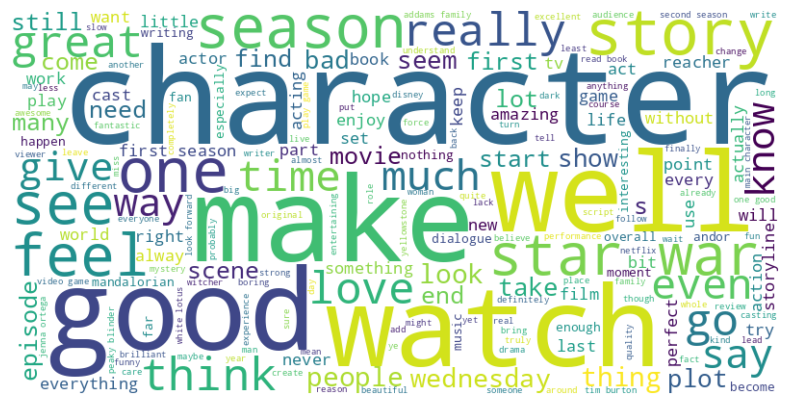

In [ ]:
# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(lemmatized_words))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar axis
plt.show()


In [ ]:
# Contar la frecuencia de las palabras lematizadas
word_counts = Counter(lemmatized_words)

# Obtener las 50 palabras más comunes
most_common_words = word_counts.most_common(50)

# Crear un DataFrame para la tabla
table_data = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])

# Mostrar la tabla
print(table_data)

      Palabra  Frecuencia
0                   12244
1          be        9594
2      season        7807
3         not        7632
4   character        6585
5        like        5573
6       watch        5570
7        good        5475
8         one        4289
9        well        4143
10      story        4056
11       make        3896
12        get        3426
13      great        3375
14        see        3286
15         's        3131
16     really        3007
17      first        2998
18       time        2839
19       love        2688
20       feel        2623
21      would        2595
22       star        2592
23         go        2529
24        war        2300
25      think        2198
26       much        2179
27       game        2159
28       even        2083
29    episode        1981
30       give        1895
31  wednesday        1885
32          2        1876
33      thing        1858
34        say        1840
35       also        1829
36       look        1825
37     peopl

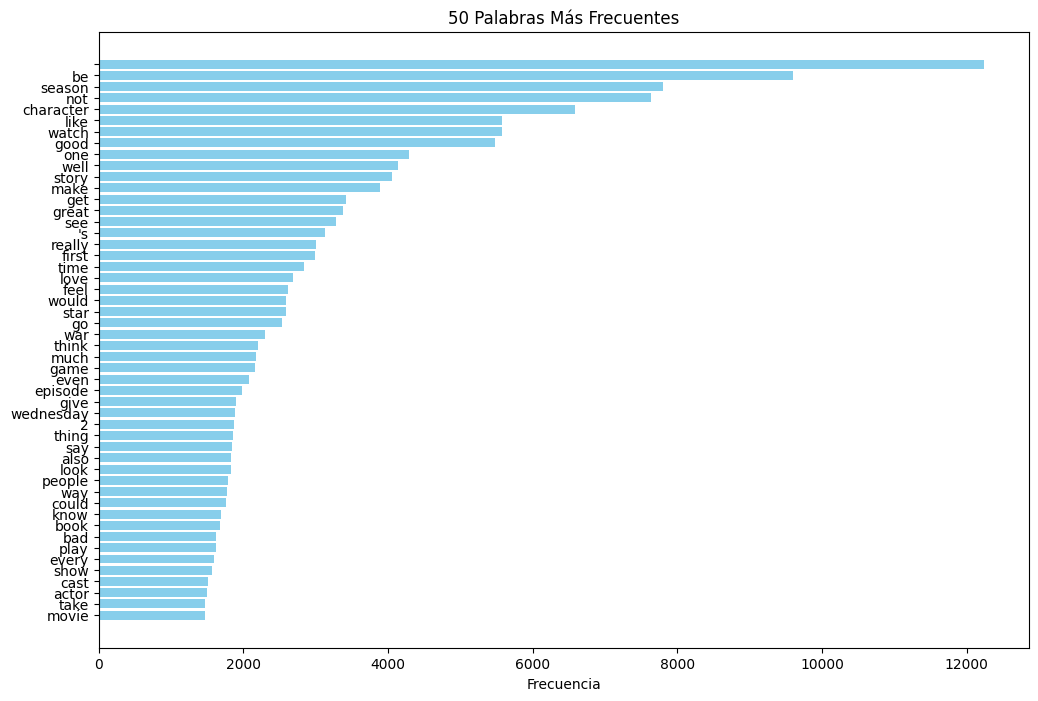

In [ ]:
# Separar las palabras y sus frecuencias
words, frequencies = zip(*most_common_words)

# Crear la figura y los ejes
plt.figure(figsize=(12, 8))

# Graficar las 50 palabras más frecuentes
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('50 Palabras Más Frecuentes')
plt.gca().invert_yaxis()  # Invertir el eje y para que la palabra más frecuente esté en la parte superior

# Mostrar el gráfico
plt.show()

In [ ]:
# Eliminar la columna de índice
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
    print('Columna eliminada: Unnamed: 0')


# Función básica de limpieza de texto
def clean_text(text):
    if isinstance(text, str):
        text = text.lower().strip()
        # Se pueden agregar pasos adicionales de limpieza (eliminación de puntuación, etc.)
        return text
    return text


# Aplicar limpieza de texto en la columna 'Review'
df['Review'] = df['Review'].apply(clean_text)
print('Limpieza de texto aplicada a la columna Review.')


# Verificar la limpieza
df['Review'].head()


Columna eliminada: Unnamed: 0
Limpieza de texto aplicada a la columna Review.


,Review
0,andor was every bit as good as i was hoping fo...
1,wow. i just finished episode 12 of the first s...
2,andor season 2 is the best star wars show ever...
3,there were a few episodes i didn't like in bot...
4,didnt like the new movies and even mandalorian...


# Regresion logistica - Ratings 9 posiciones.

Precisión de la predicción en el conjunto de prueba: 0.19891826923076922

Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.09      0.17      0.12        63
           2       0.06      0.07      0.06        29
           3       0.08      0.09      0.08        44
           4       0.02      0.03      0.02        35
           5       0.00      0.00      0.00        34
           6       0.10      0.13      0.11       143
           7       0.09      0.12      0.10       136
           8       0.13      0.17      0.15       197
           9       0.20      0.19      0.20       309
          10       0.41      0.28      0.33       674

    accuracy                           0.20      1664
   macro avg       0.12      0.12      0.12      1664
weighted avg       0.24      0.20      0.21      1664



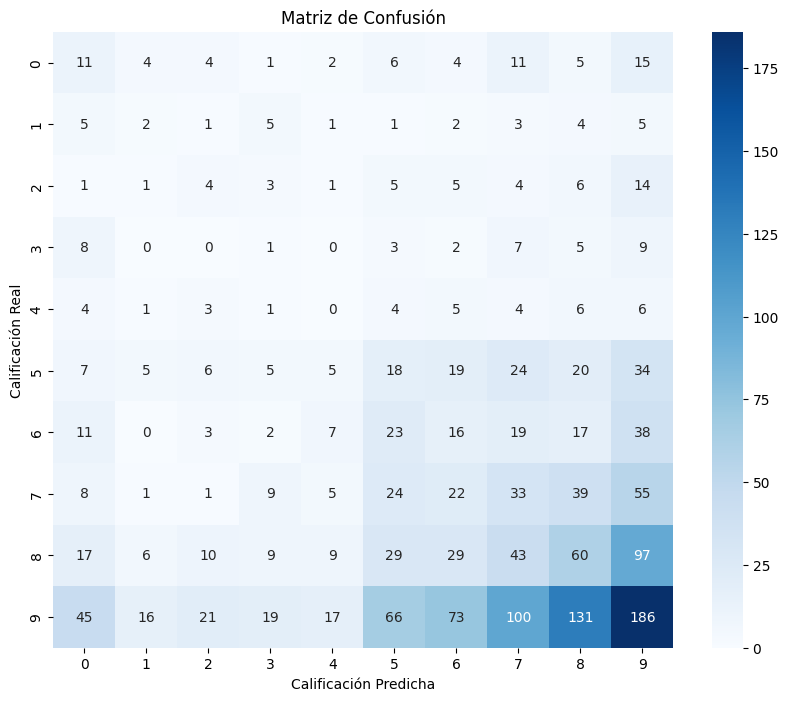

In [ ]:
# Preparamos las características y el objetivo
X = df['Review']
y = df['Rating (out of 10)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Balanceo de clases utilizando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Inicializar y entrenar un clasificador de regresión logística con más iteraciones
clf = LogisticRegression(max_iter=3000, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train_balanced, y_train_balanced)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test_tfidf)

# Calcular la puntuación de precisión
accuracy = accuracy_score(y_test, y_pred)
print('Precisión de la predicción en el conjunto de prueba:', accuracy)

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test, y_pred))

# Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Calificación Predicha')
plt.ylabel('Calificación Real')
plt.show()


analisis de la distribucion de las predicciones

Predicciones Incorrectas:
                                                 Review  Actual Rating  \
1744  i loved it at the beginning but if you start f...              6   
2114  wow , i don't know what's been keeping me from...              9   
3352  i see many reviews here applauding the series ...              9   
2321  best show ever! love beth and rip, they are my...              8   
1835  seasons 1-3 are great with an interesting plot...              9   
5912  a realy good story :-) a must see for a star w...              8   
5335  all i honestly have to say is that who they ch...              9   
4160  an intriguing and interesting tv series, you c...             10   
3783  the series was slow, many times i found myself...              9   
7019  i want to say if you like g.o.t then you must ...             10   

      Predicted Rating  
1744                 5  
2114                10  
3352                10  
2321                 5  
1835                 1  
5912     

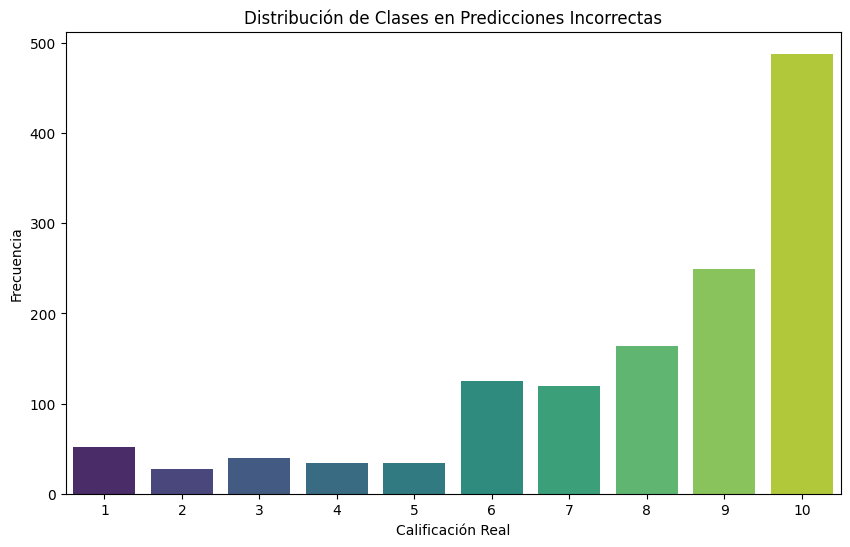

In [ ]:
# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test_tfidf)

# Crear un DataFrame con las reseñas, las predicciones y las etiquetas reales
results_df = pd.DataFrame({
    'Review': X_test,
    'Actual Rating': y_test,
    'Predicted Rating': y_pred
})

# Filtrar las instancias clasificadas incorrectamente
incorrect_predictions = results_df[results_df['Actual Rating'] != results_df['Predicted Rating']]

# Mostrar las primeras filas de las predicciones incorrectas
print("Predicciones Incorrectas:")
print(incorrect_predictions.head(10))

# Contar la frecuencia de las clases en las predicciones incorrectas
error_counts = incorrect_predictions['Actual Rating'].value_counts()

# Visualizar la distribución de las clases en las predicciones incorrectas
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual Rating', data=incorrect_predictions, palette='viridis')
plt.title('Distribución de Clases en Predicciones Incorrectas')
plt.xlabel('Calificación Real')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
print(df.head())

   Rating (out of 10)                                             Review  \
0                   9  andor was every bit as good as i was hoping fo...   
1                  10  wow. i just finished episode 12 of the first s...   
2                  10  andor season 2 is the best star wars show ever...   
3                   9  there were a few episodes i didn't like in bot...   
4                   9  didnt like the new movies and even mandalorian...   

     Show ID   Review ID  
0  tt9253284  rw10514299  
1  tt9253284   rw8690571  
2  tt9253284  rw10514285  
3  tt9253284  rw10514788  
4  tt9253284   rw8665236  


# Ratings de 9 (nueve) posiciones a binaria (tres opciones) para simplificar el modelo de predicicon

In [ ]:
# Definir una función para clasificar las calificaciones
def classify_rating(rating):
    if rating >= 0 and rating <= 4:
        return 'Negative'
    elif rating >= 5 and rating <= 6:
        return 'Neutral'
    elif rating >= 7 and rating <= 10:
        return 'Positive'
    else:
        return None  # Para manejar cualquier valor fuera del rango esperado

# Aplicar la función a la columna 'Rating (out of 10)' y crear la nueva columna 'P/N'
df['P/N'] = df['Rating (out of 10)'].apply(classify_rating)

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
print(df[['Rating (out of 10)', 'P/N']].head(15))


    Rating (out of 10)       P/N
0                    9  Positive
1                   10  Positive
2                   10  Positive
3                    9  Positive
4                    9  Positive
5                    9  Positive
6                    9  Positive
7                    9  Positive
8                    8  Positive
9                    7  Positive
10                   9  Positive
11                   9  Positive
12                  10  Positive
13                  10  Positive
14                  10  Positive


# Sentiment analisis y categorizo binario (tres opciones)

In [ ]:
from textblob import TextBlob

# Función para clasificar el sentimiento basado en la polaridad
def classify_sentiment(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity  # Obtener la polaridad
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Aplicar la función a la columna 'Review' y crear la nueva columna 'Sentiment'
df['Sentiment'] = df['Review'].apply(classify_sentiment)

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
print(df[['Review', 'P/N', 'Sentiment']].head(15))


                                               Review       P/N Sentiment
0   andor was every bit as good as i was hoping fo...  Positive  Positive
1   wow. i just finished episode 12 of the first s...  Positive  Positive
2   andor season 2 is the best star wars show ever...  Positive  Positive
3   there were a few episodes i didn't like in bot...  Positive  Positive
4   didnt like the new movies and even mandalorian...  Positive  Positive
5   i'll say it again: andor is one of the best pi...  Positive  Positive
6   this is, minute for minute, some of the best t...  Positive  Positive
7   andor is why i pay my disney+ subscription. th...  Positive  Positive
8   i am going to put it plain and simple.  this s...  Positive  Positive
9   this is the show anyone who grew up with class...  Positive  Positive
10  i'm note sure which is my favorite between the...  Positive  Positive
11  andor is everything i didn't know i needed to ...  Positive  Positive
12  arguably the best thing to come ou

# Analizo la prediccion del sentimiento contra las categorias binarias de los ratings y comparo

Precisión del análisis de sentimiento: 70.95%


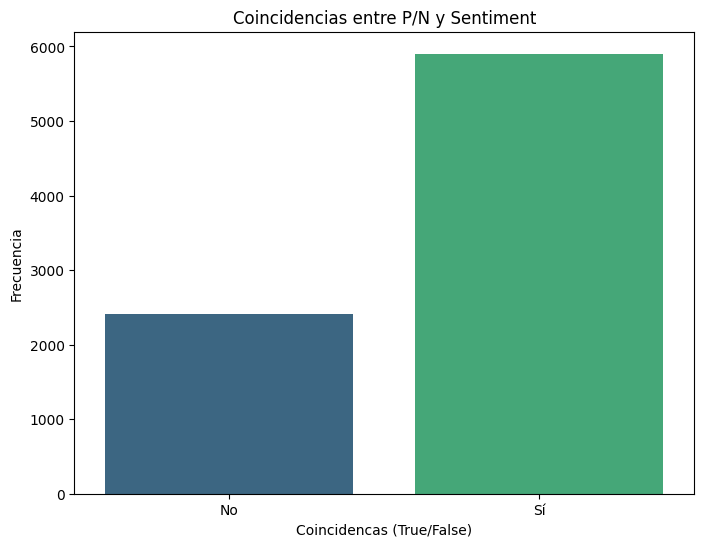

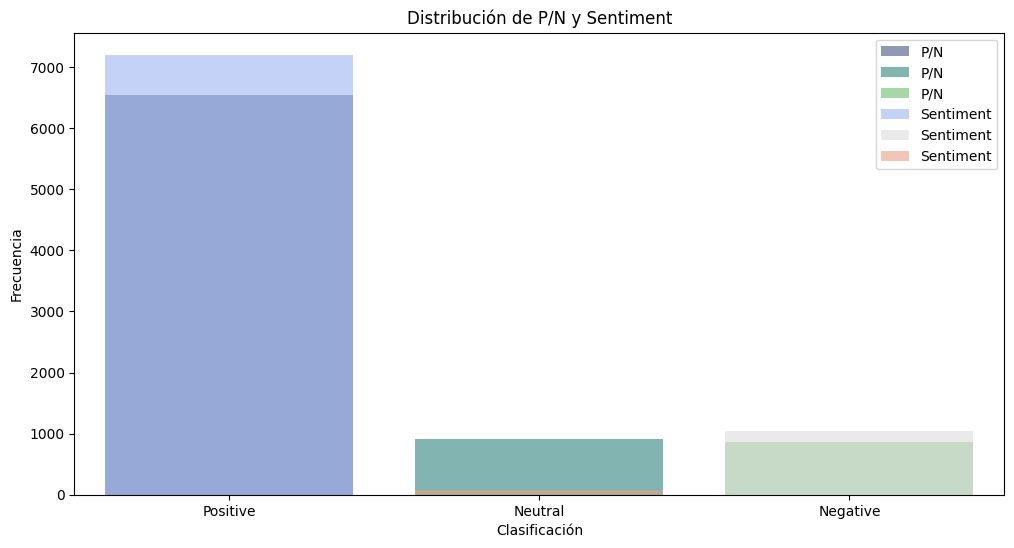

In [ ]:
# Contar las coincidencias entre 'P/N' y 'Sentiment'
matches = (df['P/N'] == df['Sentiment']).sum()
total = df.shape[0]
accuracy = matches / total

# Imprimir la precisión
print(f'Precisión del análisis de sentimiento: {accuracy:.2%}')

# Crear un DataFrame para visualizar las coincidencias y discrepancias
comparison_df = df[['P/N', 'Sentiment']].copy()
comparison_df['Match'] = comparison_df['P/N'] == comparison_df['Sentiment']

# Contar coincidencias y discrepancias
match_counts = comparison_df['Match'].value_counts()

# Visualizar los resultados
plt.figure(figsize=(8, 6))
sns.countplot(x='Match', data=comparison_df, palette='viridis')
plt.title('Coincidencias entre P/N y Sentiment')
plt.xlabel('Coincidencas (True/False)')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

# Mostrar la distribución de P/N y Sentiment
plt.figure(figsize=(12, 6))
sns.countplot(x='P/N', data=comparison_df, palette='viridis', alpha=0.6, label='P/N')
sns.countplot(x='Sentiment', data=comparison_df, palette='coolwarm', alpha=0.6, label='Sentiment')
plt.title('Distribución de P/N y Sentiment')
plt.xlabel('Clasificación')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

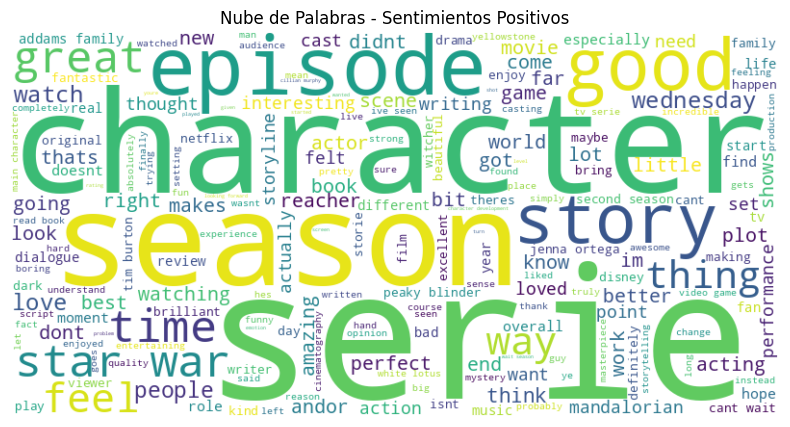

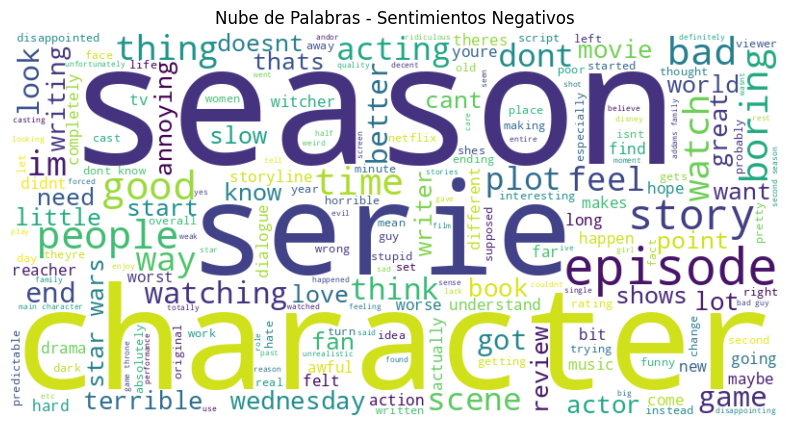

Trigramas más comunes - Sentimientos Positivos:
star wars universe: 186
cant wait season: 177
star wars fan: 111
wait season 2: 104
best star wars: 90
looking forward season: 87
like star wars: 71
star wars fans: 64
star wars movies: 55
disney star wars: 52

Trigramas más comunes - Sentimientos Negativos:
like star wars: 12
star wars universe: 11
season 1 2: 11
episodes season 2: 9
reacher reacher reacher: 9
watch season 2: 9
seasons 1 2: 8
cant wait season: 7
dont waste time: 7
read books played: 7


In [ ]:
# Función para limpiar el texto y eliminar stopwords
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Eliminar menciones de Twitter
    text = re.sub(r'@\w+', '', text)

    # Eliminar caracteres especiales y puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenizar y eliminar stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Filtrar reseñas positivas y negativas
positive_reviews = df[df['Sentiment'] == 'Positive']['Review'].apply(clean_text)
negative_reviews = df[df['Sentiment'] == 'Negative']['Review'].apply(clean_text)

# Unir todas las reseñas en una sola cadena
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Generar la nube de palabras para sentimientos positivos
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Mostrar la nube de palabras para sentimientos positivos
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Sentimientos Positivos')
plt.show()

# Generar la nube de palabras para sentimientos negativos
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Mostrar la nube de palabras para sentimientos negativos
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Sentimientos Negativos')
plt.show()

# Función para generar trigramas
def generate_trigrams(text):
    tokens = text.split()
    trigrams = ngrams(tokens, 3)
    return [' '.join(trigram) for trigram in trigrams]

# Generar trigramas para sentimientos positivos
positive_trigrams = generate_trigrams(positive_text)
positive_trigram_counts = Counter(positive_trigrams).most_common(10)

# Generar trigramas para sentimientos negativos
negative_trigrams = generate_trigrams(negative_text)
negative_trigram_counts = Counter(negative_trigrams).most_common(10)

# Mostrar los trigramas más comunes para sentimientos positivos
print("Trigramas más comunes - Sentimientos Positivos:")
for trigram, count in positive_trigram_counts:
    print(f"{trigram}: {count}")

# Mostrar los trigramas más comunes para sentimientos negativos
print("\nTrigramas más comunes - Sentimientos Negativos:")
for trigram, count in negative_trigram_counts:
    print(f"{trigram}: {count}")


**Trigramas de Sentimientos Positivos**


1. Foco en la Franquicia: Los trigramas más comunes, como "star wars universe",
"star wars fan" y "best star wars", indican un fuerte apego y entusiasmo hacia la franquicia. Esto sugiere que los fans están emocionados por el contenido relacionado con "Star Wars" y lo consideran de alta calidad.
2. Expectativa y Anticipación: Frases como "cant wait season" y "looking forward season" reflejan una gran anticipación por las próximas temporadas. Esto sugiere que los espectadores están ansiosos por más contenido, lo que puede ser un indicador de éxito y popularidad de la serie.
3. Identidad de los Fans: La repetición de términos como "star wars fans" y "like star wars" muestra que los reseñadores se identifican fuertemente como parte de la comunidad de fans. Esto puede influir en su percepción positiva, ya que el sentido de pertenencia puede llevar a evaluaciones más favorables.



**Trigramas de Sentimientos Negavtivos**








1. Descontento con el Desarrollo: Trigramas como "season 1 2" y "episodes season 2" sugieren que algunos usuarios pueden estar insatisfechos con el desarrollo de la trama en las temporadas iniciales y su transición a las siguientes. Esto podría indicar que los espectadores sienten que la calidad ha disminuido o que las expectativas no se han cumplido.
2. Frustración y Desaprobación: Frases como "dont waste time" y "reacher reacher reacher" reflejan una clara frustración. La repetición de "reacher" podría indicar que los usuarios están descontentos con un personaje o una narrativa específica, lo que resalta la insatisfacción con ciertos elementos de la serie.
3. Expectativas No Cumplidas: El trigramas "cant wait season" también aparece en el contexto negativo, lo que sugiere que, aunque los usuarios estaban emocionados por el contenido, su experiencia no cumplió con esas expectativas. Esto puede ser un fuerte indicador de que las reseñas negativas provienen de una decepción tras una anticipación previa.





**Conclusión**
La comparación de los trigramas más comunes en reseñas positivas y negativas revela un contraste significativo en las percepciones de los usuarios. Mientras que los trigramas positivos reflejan entusiasmo, anticipación y un fuerte sentido de comunidad entre los fans, los negativos indican frustración, descontento con el desarrollo de la trama y expectativas no cumplidas. Estos hallazgos pueden ser útiles para entender mejor las áreas de mejora en futuras producciones y cómo las emociones de los fans influyen en sus evaluaciones.

In [ ]:
# Función para limpiar el texto y eliminar stopwords
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Eliminar menciones de Twitter
    text = re.sub(r'@\w+', '', text)

    # Eliminar caracteres especiales y puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenizar y eliminar stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Filtrar reseñas positivas y negativas
positive_reviews = df[df['Sentiment'] == 'Positive']['Review'].apply(clean_text)
negative_reviews = df[df['Sentiment'] == 'Negative']['Review'].apply(clean_text)

# Unir todas las reseñas en una sola cadena
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)



# Función para generar trigramas
def generate_trigrams(text):
    tokens = text.split()
    trigrams = ngrams(tokens, 4)
    return [' '.join(trigram) for trigram in trigrams]

# Generar trigramas para sentimientos positivos
positive_trigrams = generate_trigrams(positive_text)
positive_trigram_counts = Counter(positive_trigrams).most_common(10)

# Generar trigramas para sentimientos negativos
negative_trigrams = generate_trigrams(negative_text)
negative_trigram_counts = Counter(negative_trigrams).most_common(10)

# Mostrar los trigramas más comunes para sentimientos positivos
print("Trigramas más comunes - Sentimientos Positivos:")
for trigram, count in positive_trigram_counts:
    print(f"{trigram}: {count}")

# Mostrar los trigramas más comunes para sentimientos negativos
print("\nTrigramas más comunes - Sentimientos Negativos:")
for trigram, count in negative_trigram_counts:
    print(f"{trigram}: {count}")

Trigramas más comunes - Sentimientos Positivos:
cant wait season 2: 77
looking forward season 2: 30
pedro pascal bella ramsey: 29
read books played games: 27
galaxy far far away: 21
feels like star wars: 20
cant wait second season: 17
played games read books: 17
im looking forward season: 16
night lucky night lucky: 16

Trigramas más comunes - Sentimientos Negativos:
reacher reacher reacher reacher: 8
season 1 season 2: 5
read books played games: 5
sorry 600 letters little: 5
600 letters little im: 5
letters little im trying: 5
little im trying minimum: 5
cant wait season 2: 4
im trying minimum sorry: 4
trying minimum sorry 600: 4


In [ ]:
# Mostrar las primeras filas del DataFrame para verificar la nueva columna
print(df.head(15))

    Rating (out of 10)                                             Review  \
0                    9  andor was every bit as good as i was hoping fo...   
1                   10  wow. i just finished episode 12 of the first s...   
2                   10  andor season 2 is the best star wars show ever...   
3                    9  there were a few episodes i didn't like in bot...   
4                    9  didnt like the new movies and even mandalorian...   
5                    9  i'll say it again: andor is one of the best pi...   
6                    9  this is, minute for minute, some of the best t...   
7                    9  andor is why i pay my disney+ subscription. th...   
8                    8  i am going to put it plain and simple.  this s...   
9                    7  this is the show anyone who grew up with class...   
10                   9  i'm note sure which is my favorite between the...   
11                   9  andor is everything i didn't know i needed to ...   

# Machine Learning usando BERT con modificacion de hiperparametros - red neuronal de 5 epocas. sobre variable objetivo binaria

In [ ]:
# Preparamos las características y el objetivo
X = df['Review'].tolist()
y = df['P/N'].tolist()

# Convertir las etiquetas a números
label_mapping = {'Positive': 0, 'Neutral': 1, 'Negative': 2}
y = [label_mapping[label] for label in y]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los datos
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, y_train)
test_dataset = ReviewDataset(test_encodings, y_test)

# Cargar el modelo de BERT para clasificación
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Ajusta num_labels según tus clases

# Configurar los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,  # Aumentar el número de épocas si es necesario
    per_device_train_batch_size=12,  # Ajustar según la memoria de la GPU
    per_device_eval_batch_size=32,  # Tamaño de lote más grande para evaluación
    warmup_steps=1000,  # Ajustar según el tamaño del conjunto de datos
    weight_decay=0.01,  # Mantener el decaimiento de peso
    learning_rate=3e-5,  # Probar con una tasa de aprendizaje más baja
    logging_dir='./logs',
    logging_steps=100,  # Frecuencia de registro
)




tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

# Entrenar el modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: natan_cuello (natan_cuello-collab-land) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
100,1.113500
200,0.724700
300,0.708800
400,0.638700
500,0.676200
600,0.661900
700,0.654100
800,0.653500
900,0.703000
1000,0.637000


TrainOutput(global_step=2775, training_loss=0.5788541247393634, metrics={'train_runtime': 3245.4209, 'train_samples_per_second': 10.253, 'train_steps_per_second': 0.855, 'total_flos': 8755098974899200.0, 'train_loss': 0.5788541247393634, 'epoch': 5.0})

In [ ]:
# Predecir en el conjunto de prueba
y_pred = trainer.predict(test_dataset)

# Obtener las predicciones
y_pred_labels = torch.argmax(torch.tensor(y_pred.predictions), axis=1).numpy()




Informe de Clasificación:
              precision    recall  f1-score   support

    Positive       0.81      0.88      0.84      1316
     Neutral       0.13      0.09      0.11       177
    Negative       0.22      0.14      0.17       171

    accuracy                           0.72      1664
   macro avg       0.39      0.37      0.37      1664
weighted avg       0.67      0.72      0.69      1664



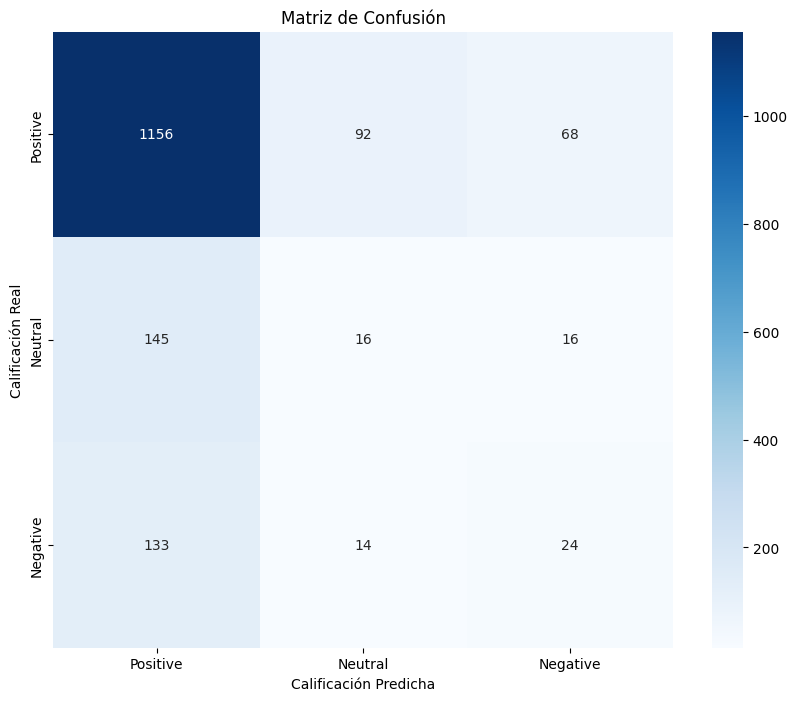

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_labels)

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test, y_pred_labels, target_names=['Positive', 'Neutral', 'Negative']))

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('Matriz de Confusión')
plt.xlabel('Calificación Predicha')
plt.ylabel('Calificación Real')
plt.show()


El informe de clasificación muestra el rendimiento de un modelo en tres categorías:

Positivo: Buen rendimiento (precision: 0.81, recall: 0.88, f1-score: 0.84).
Neutral: Bajo rendimiento (precision: 0.13, recall: 0.09, f1-score: 0.11).
Negativo: Bajo rendimiento (precision: 0.22, recall: 0.14, f1-score: 0.17).
Accuracy: 72% (buen porcentaje de predicciones correctas).
Macro Avg: 0.39 (rendimiento moderado en general).
Weighted Avg: 0.67 (mejor rendimiento, pero aún con áreas de mejora).
En resumen, el modelo es efectivo para la clase Positiva, pero necesita mejorar en las clases Neutral y Negativa.

trabajo pendiente. clases desbalanceadas

# Machine Learning usando BERT con ajuste de hiperparametros - red neuronal de 5 epocas. sobre variable objetivo ratings de nueve posiciones.

In [ ]:
# Preparamos las características y el objetivo
X = df['Review'].tolist()
y = df['Rating (out of 10)'].tolist()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los datos
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Convertir a tensores de PyTorch
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, y_train)
test_dataset = ReviewDataset(test_encodings, y_test)

# Cargar el modelo de BERT para clasificación
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=11)  # Ajusta num_labels según tus clases

# Configurar los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,  # Aumentar el número de épocas si es necesario
    per_device_train_batch_size=12,  # Ajustar según la memoria de la GPU
    per_device_eval_batch_size=32,  # Tamaño de lote más grande para evaluación
    warmup_steps=1000,  # Ajustar según el tamaño del conjunto de datos
    weight_decay=0.01,  # Mantener el decaimiento de peso
    learning_rate=3e-5,  # Probar con una tasa de aprendizaje más baja
    logging_dir='./logs',
    logging_steps=100,  # Frecuencia de registro
)



# Entrenar el modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

# Evaluar el modelo
trainer.evaluate()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,2.436500
200,2.022200
300,1.909600
400,1.795800
500,1.824900
600,1.801000
700,1.835700
800,1.795600
900,1.868000
1000,1.805700


{'eval_loss': 2.157945394515991,
 'eval_runtime': 51.8044,
 'eval_samples_per_second': 32.121,
 'eval_steps_per_second': 1.004,
 'epoch': 5.0}

Precisión de la predicción en el conjunto de prueba: 29.63%

Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.12      0.10      0.11        63
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00        34
           6       0.08      0.08      0.08       143
           7       0.12      0.07      0.09       136
           8       0.13      0.16      0.14       197
           9       0.17      0.10      0.13       309
          10       0.42      0.59      0.50       674

    accuracy                           0.30      1664
   macro avg       0.10      0.11      0.10      1664
weighted avg       0.24      0.30      0.26      1664



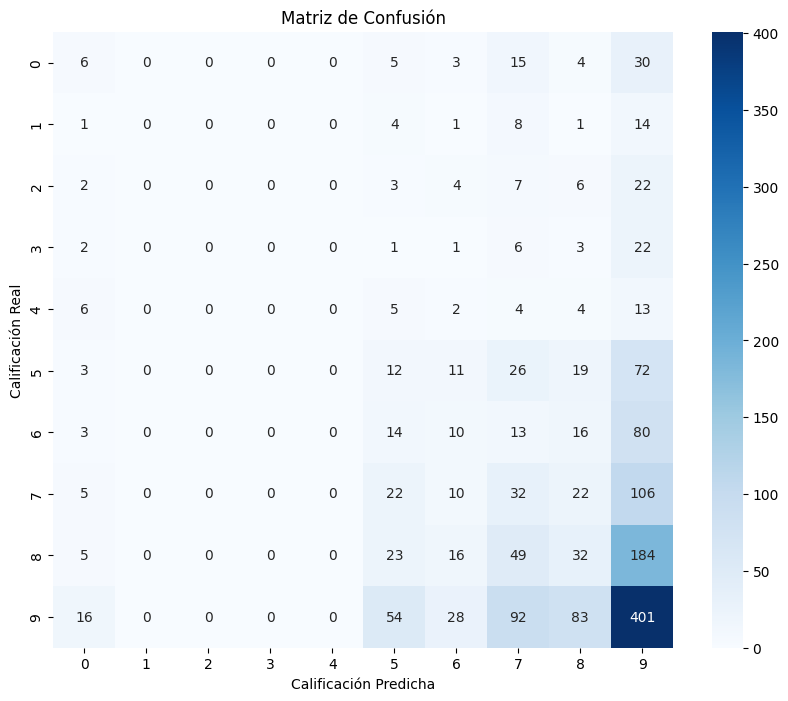

In [ ]:
# Predecir en el conjunto de prueba
y_pred = trainer.predict(test_dataset)

# Obtener las predicciones
y_pred_labels = torch.argmax(torch.tensor(y_pred.predictions), axis=1).numpy()

# Calcular la puntuación de precisión
accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Precisión de la predicción en el conjunto de prueba: {accuracy:.2%}')

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test, y_pred_labels))

# Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Calificación Predicha')
plt.ylabel('Calificación Real')
plt.show()


Validacion cruzada

In [ ]:
# Definir el número de pliegues
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Almacenar los resultados
accuracies = []
all_y_true = []
all_y_pred = []

# Tokenizar los datos una vez
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

for train_index, val_index in kf.split(X):
    # Dividir los datos en conjuntos de entrenamiento y validación
    X_train, X_val = np.array(X)[train_index], np.array(X)[val_index]
    y_train, y_val = np.array(y)[train_index], np.array(y)[val_index]

    # Tokenizar los datos
    train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
    val_encodings = tokenizer(X_val.tolist(), truncation=True, padding=True)

    # Crear datasets
    train_dataset = ReviewDataset(train_encodings, y_train)
    val_dataset = ReviewDataset(val_encodings, y_val)

    # Cargar el modelo de BERT para clasificación
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=11)

    # Configurar los argumentos de entrenamiento
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=6,  # Aumentar el número de épocas si es necesario
        per_device_train_batch_size=16,  # Ajustar según la memoria de la GPU
        per_device_eval_batch_size=32,  # Tamaño de lote más grande para evaluación
        warmup_steps=1000,  # Ajustar según el tamaño del conjunto de datos
        weight_decay=0.01,  # Mantener el decaimiento de peso
        learning_rate=3e-5,  # Probar con una tasa de aprendizaje más baja
        logging_dir='./logs',
        logging_steps=100,  # Frecuencia de registro
    )



    # Entrenar el modelo
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
    )

    trainer.train()

    # Predecir en el conjunto de validación
    y_pred = trainer.predict(val_dataset)

    # Obtener las predicciones
    y_pred_labels = torch.argmax(torch.tensor(y_pred.predictions), axis=1).numpy()

    # Calcular la puntuación de precisión
    accuracy = accuracy_score(y_val, y_pred_labels)
    accuracies.append(accuracy)

    # Almacenar las etiquetas verdaderas y predicciones
    all_y_true.extend(y_val)
    all_y_pred.extend(y_pred_labels)

# Mostrar resultados de la validación cruzada
print(f'Precisión promedio de la validación cruzada: {np.mean(accuracies):.2%}')

# Mostrar el informe de clasificación
print('\nInforme de Clasificación Final:')
print(classification_report(all_y_true, all_y_pred))

# Graficar la matriz de confusión
cm = confusion_matrix(all_y_true, all_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Validación Cruzada')
plt.xlabel('Calificación Predicha')
plt.ylabel('Calificación Real')
plt.show()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,2.467200
200,1.970200
300,1.874000
400,1.826500
500,1.871800
600,1.832100
700,1.866500
800,1.847200
900,1.798500
1000,1.797300


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,2.427000
200,1.982800
300,1.846200
400,1.863700
500,1.854300
600,1.790400
700,1.814000
800,1.851200
900,1.847900
1000,1.777000


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,2.421500
200,1.977800
300,1.857500
400,1.829300
500,1.852900
600,1.830500
700,1.855600
800,1.832400
900,1.784100
1000,1.812300


En este proyecto, se explora la relación entre el sentimiento expresado en las reseñas y los ratings otorgados por los usuarios. La hipótesis principal es que las reseñas que transmiten un sentimiento positivo, caracterizadas por un lenguaje optimista y favorable hacia la película o el show, tienden a estar asociadas con ratings más altos. Para investigar esta relación, se aplican técnicas de procesamiento de lenguaje natural (NLP) que permiten analizar el sentimiento de cada reseña, clasificándolas en categorías como "positivo", "neutral" o "negativo". Al correlacionar estos resultados con los ratings, se busca demostrar que un mayor porcentaje de reseñas positivas se traduce en calificaciones más altas, subrayando así la importancia del sentimiento en la evaluación de las producciones.

Además, se examina el impacto de palabras clave en los ratings. La hipótesis en este caso es que ciertas palabras o frases específicas en las reseñas influyen significativamente en la calificación que los usuarios otorgan. Términos como "fantástico", "increíble" o "aburrido" pueden estar fuertemente correlacionados con ratings altos o bajos. A través de un análisis de frecuencia de palabras y la evaluación del contexto en el que aparecen, se identifican términos que son indicativos de una evaluación positiva o negativa. Este enfoque no solo resalta la relevancia del lenguaje utilizado en las reseñas, sino que también justifica el uso de técnicas de NLP para extraer estas características lingüísticas, las cuales se utilizan como variables en el modelo de machine learning para predecir los ratings.

Al analizar el conjunto de datos inicial, se observa que la media de los ratings es de aproximadamente 8.06, con una desviación estándar de 2.44. Esto indica que la mayoría de las reseñas tienden a estar en el rango superior de la escala de ratings, ya que el 75% de las reseñas tienen un rating de 10 o 9. Este sesgo hacia ratings más altos sugiere que los usuarios tienden a calificar positivamente las producciones, lo que puede estar relacionado con una tendencia general en la audiencia a ser más generosa en sus evaluaciones.

La tendencia a tener ratings más altos también se refleja en la distribución de las clases en los modelos de clasificación. En el primer modelo, que utiliza clases binarias (positivo, negativo y neutral), se observa que la clase "Positivo" tiene un soporte considerable (1316), lo que indica que hay una gran cantidad de reseñas que se consideran positivas. Esto, a su vez, se traduce en un alto recall y precisión para esta clase, lo que sugiere que el modelo es efectivo para identificar reseñas positivas. Sin embargo, las clases "Neutral" y "Negativa" tienen un soporte mucho menor, lo que puede indicar que hay menos reseñas que critican las producciones, contribuyendo a la tendencia de ratings altos.

En el segundo modelo, que intenta predecir ratings específicos, se observa que la clase de rating 10 tiene un soporte significativo (674) y muestra un recall y f1-score relativamente altos. Esto sugiere que el modelo tiene cierta capacidad para identificar reseñas que corresponden a ratings perfectos. Sin embargo, las clases de ratings más bajos (1 a 6) tienen un soporte muy bajo y muestran un rendimiento deficiente en términos de precisión y recall. Esto refuerza la idea de que hay una escasez de reseñas negativas en el conjunto de datos, lo que contribuye a la tendencia general hacia ratings más altos.

La correlación entre el conjunto de datos inicial y los modelos sugiere que la tendencia a recibir reseñas positivas y ratings altos puede estar influenciada por un sesgo en la audiencia, donde los usuarios son más propensos a dejar reseñas favorables. Esto puede ser el resultado de varios factores, como la calidad de las producciones, la selección de contenido que se presenta en IMDB, o incluso la naturaleza de la comunidad de usuarios que tiende a valorar más positivamente ciertos géneros o estilos de producción.

En resumen, la tendencia a tener ratings más altos en el conjunto de datos inicial se ve reflejada en los modelos de clasificación, donde la mayoría de las reseñas son positivas y las clases de ratings más bajos son escasas. Esto indica un posible sesgo en la evaluación de las producciones, lo que puede influir en la efectividad de los modelos de predicción y su capacidad para generalizar a nuevas reseñas.

El análisis del sentimiento y el impacto de palabras clave en las reseñas de IMDB tiene múltiples utilidades en el ámbito del negocio, especialmente en la industria del entretenimiento y el cine. En primer lugar, comprender la relación entre el sentimiento de las reseñas y los ratings permite a los estudios de cine y plataformas de streaming evaluar la recepción de sus producciones de manera más efectiva. Esto les ayuda a identificar qué elementos de una película o serie resonan positivamente con la audiencia y cuáles no, lo que puede guiar decisiones sobre futuras producciones, marketing y estrategias de promoción.

Además, el modelo puede ser utilizado para realizar análisis predictivos que anticipen el éxito de una película o serie antes de su lanzamiento. Al analizar reseñas previas y el sentimiento asociado, los estudios pueden estimar cómo podría ser la recepción del público, lo que les permite ajustar sus estrategias de lanzamiento y promoción para maximizar el impacto.

Otra utilidad importante es la segmentación de la audiencia. Al identificar patrones en el lenguaje utilizado en las reseñas, las empresas pueden adaptar su contenido y campañas de marketing a diferentes segmentos de audiencia, mejorando así la efectividad de sus esfuerzos promocionales.

Finalmente, este tipo de análisis también puede ser valioso para la gestión de la reputación. Las plataformas de streaming y los estudios pueden monitorear el sentimiento en tiempo real y responder rápidamente a críticas negativas, ajustando su enfoque para mejorar la percepción pública de sus producciones. En resumen, el modelo no solo proporciona información valiosa sobre la calidad de las producciones, sino que también ofrece herramientas estratégicas para la toma de decisiones informadas en el negocio del entretenimiento.